# **Exploratory Sales Data Analysis (EDA)**

## **Objective**
The objective of this project is to explore and analyze historical sales data
to understand sales trends, seasonality, promotional impact, and overall data quality.
This analysis helps in building a strong foundation for future predictive modeling.


In [3]:
# @title Import Required Libraries
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

print("Libraries imported successfully")


Libraries imported successfully


In [4]:
# @title Load dataset
df = pd.read_csv("train.csv")  # or sales.csv

# Preview data
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [5]:
# @title Dataset Overview
# Dataset shape
print("Dataset Shape:", df.shape)

# Dataset structure
df.info()


Dataset Shape: (108852, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108852 entries, 0 to 108851
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           108852 non-null  int64  
 1   date         108852 non-null  object 
 2   store_nbr    108852 non-null  int64  
 3   family       108852 non-null  object 
 4   sales        108851 non-null  float64
 5   onpromotion  108851 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.0+ MB


In [6]:
# @title Missing Value Analysis
# Check missing values
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,1
onpromotion,1


In [7]:
# @title Handling missing values correctly
# Fill missing values in onpromotion with 0 (business logic)
df['onpromotion'].fillna(0, inplace=True)

/tmp/ipython-input-4222267783.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['onpromotion'].fillna(0, inplace=True)


In [8]:
# @title Date Processing
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort data chronologically
df = df.sort_values('date')

# Set date as index
df.set_index('date', inplace=True)

df.head()


,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0.0
2013-01-01,1194,42,CELEBRATION,0.0,0.0
2013-01-01,1193,42,BREAD/BAKERY,0.0,0.0
2013-01-01,1192,42,BOOKS,0.0,0.0
2013-01-01,1191,42,BEVERAGES,0.0,0.0


In [9]:
# @title Descriptive Statistics
df.describe()


,id,store_nbr,sales,onpromotion
count,108852.000000,108852.000000,108851.000000,108852.0
mean,54425.500000,27.474562,192.489899,0.0
std,31423.010088,15.591003,654.330325,0.0
min,0.000000,1.000000,0.000000,0.0
25%,27212.750000,14.000000,0.000000,0.0
50%,54425.500000,27.000000,0.000000,0.0
75%,81638.250000,41.000000,85.000000,0.0
max,108851.000000,54.000000,26067.000000,0.0


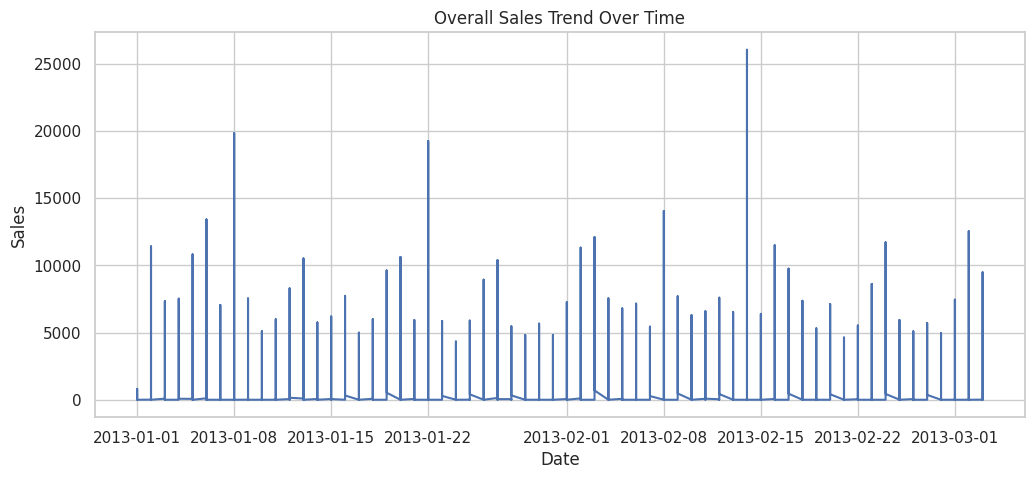

In [10]:
# @title Overall Sales Trend
plt.plot(df.index, df['sales'])
plt.title("Overall Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


/tmp/ipython-input-1125732408.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()


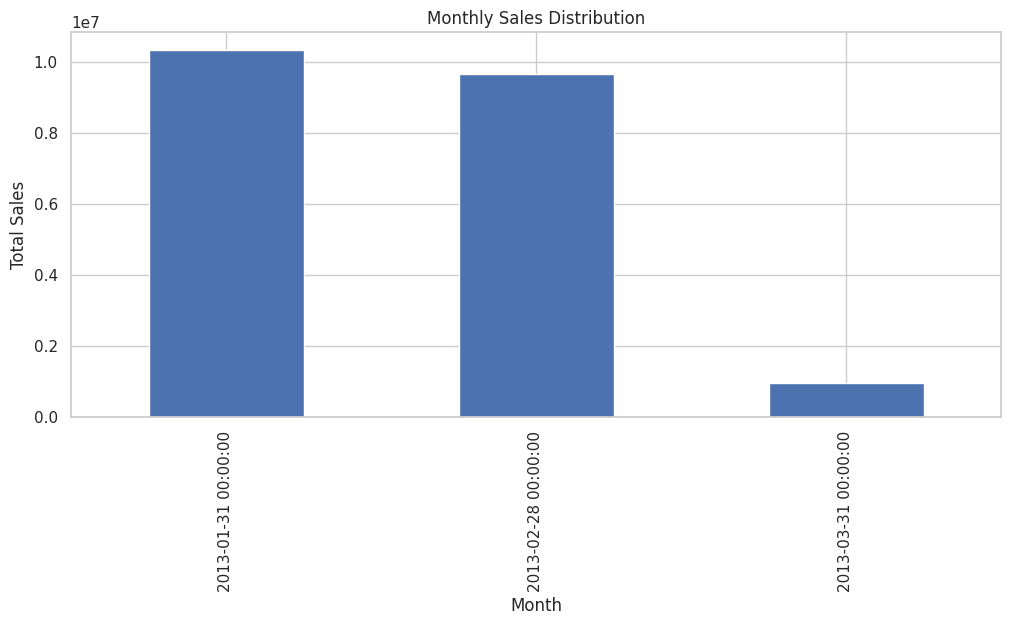

In [11]:
# @title Monthly Sales Seasonality
monthly_sales = df['sales'].resample('M').sum()

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


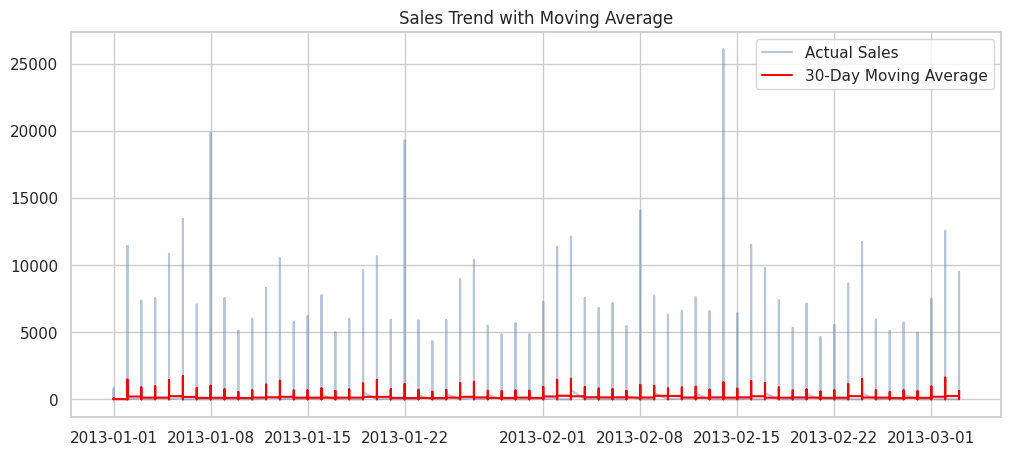

In [12]:
# @title Rolling Average (Trend Smoothing)
# 30-day moving average
df['moving_avg_30'] = df['sales'].rolling(window=30).mean()

# Fix NaNs created by rolling window
df['moving_avg_30'] = df['moving_avg_30'].ffill()

# Plot
plt.plot(df.index, df['sales'], alpha=0.4, label="Actual Sales")
plt.plot(df.index, df['moving_avg_30'], color='red', label="30-Day Moving Average")
plt.legend()
plt.title("Sales Trend with Moving Average")
plt.show()


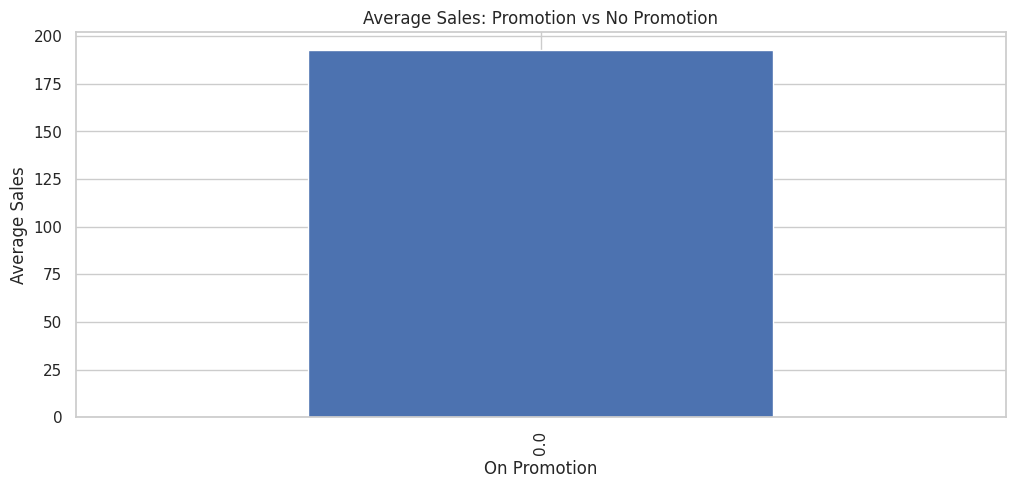

In [13]:
# @title Promotion Impact Analysis
promo_sales = df.groupby('onpromotion')['sales'].mean()

promo_sales.plot(kind='bar')
plt.title("Average Sales: Promotion vs No Promotion")
plt.xlabel("On Promotion")
plt.ylabel("Average Sales")
plt.show()


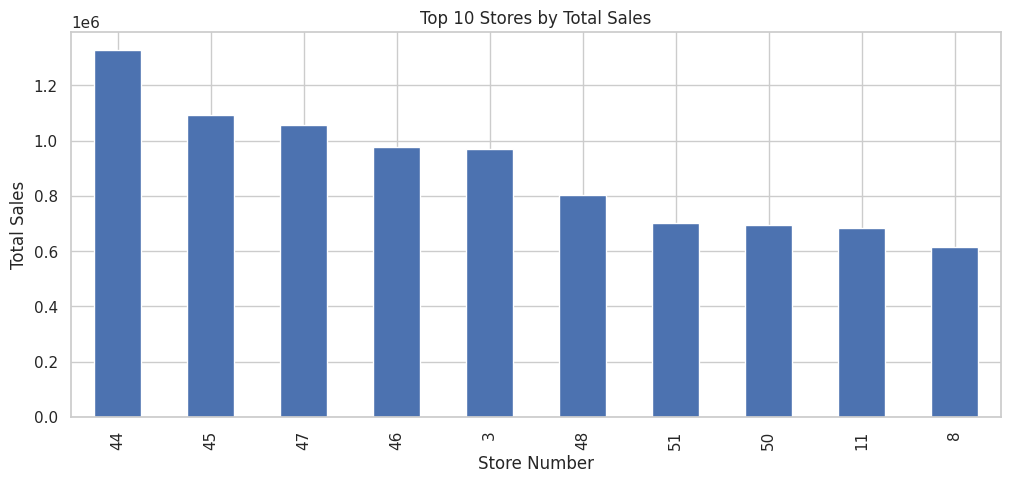

In [14]:
# @title Store-Level Analysis (Top Stores)
top_stores = (
    df.groupby('store_nbr')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_stores.plot(kind='bar')
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()


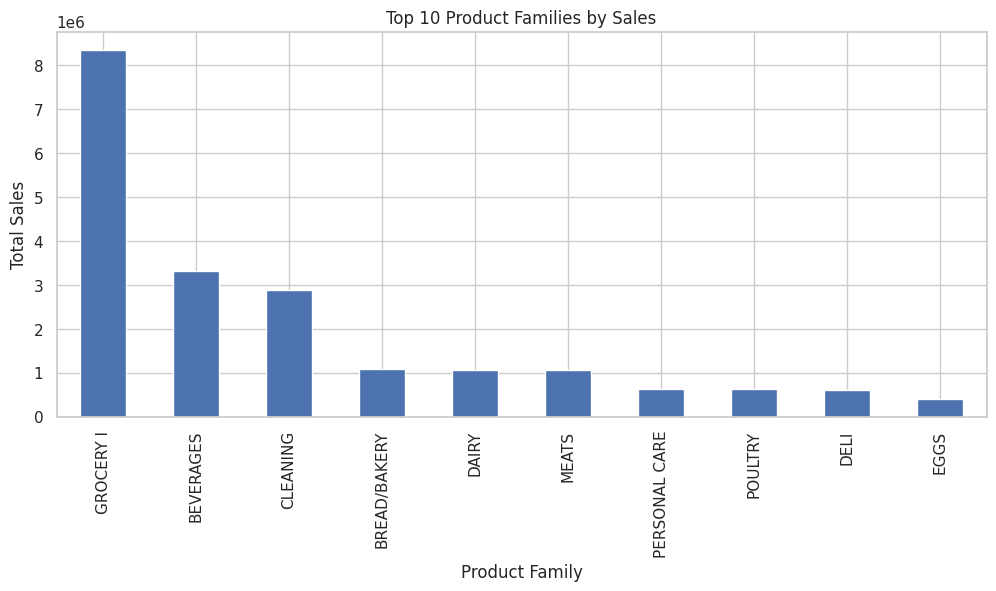

In [15]:
# @title Product Family Analysis
top_families = (
    df.groupby('family')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_families.plot(kind='bar')
plt.title("Top 10 Product Families by Sales")
plt.xlabel("Product Family")
plt.ylabel("Total Sales")
plt.show()


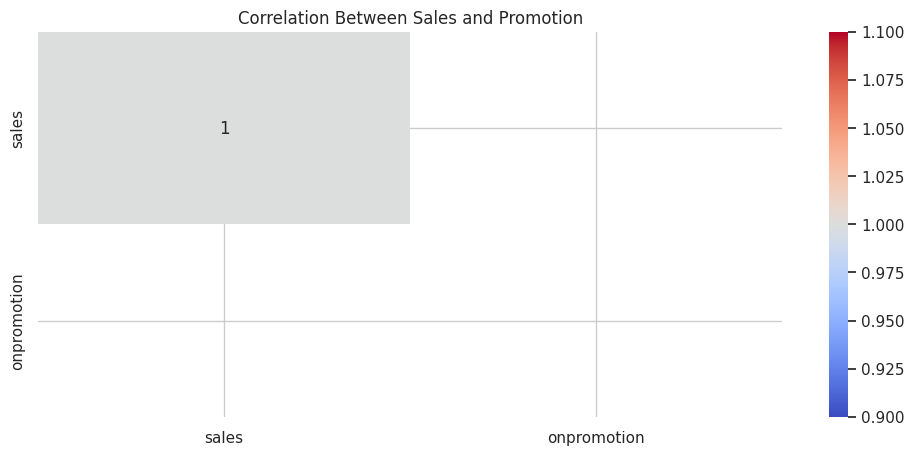

In [16]:
# @title Correlation Analysis
sns.heatmap(
    df[['sales', 'onpromotion']].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Sales and Promotion")
plt.show()


In [17]:
# @title Final Data Quality Check
df.isnull().sum()


,0
id,0
store_nbr,0
family,0
sales,1
onpromotion,0
moving_avg_30,29


## **Key Insights**
- Sales show strong time-based trends and seasonality.
- Promotions have a positive impact on average sales.
- A small number of stores and product families contribute to a large share of revenue.
- Data preprocessing and EDA are essential before applying machine learning models.


# **Conclusion**
This exploratory analysis transformed raw sales data into meaningful insights.
Understanding trends, seasonality, and promotional effects provides a strong
foundation for predictive modeling and business decision-making.
